In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker


In [2]:
df = pd.read_csv("ce_setout_final_pruned_R.csv")

In [3]:
df

,Unnamed: 0,TimeStamp,LineName,JobNumber,DefectCountSum,SampleSizeSum
0,0,2021-01-01 01:30:00,J16,J18183,16,1300
1,1,2021-01-01 01:30:00,J19,J18093,24,1800
2,2,2021-01-01 02:30:00,J17,J18152,24,1800
3,3,2021-01-01 02:30:00,J18,J18094,23,1800
4,4,2021-01-01 03:30:00,J20,J18165,22,450
...,...,...,...,...,...,...
8800,8800,2022-12-01 04:30:00,J15,J25062,16,1100
8801,8801,2022-12-01 04:30:00,J18,J25018,20,2000
8802,8802,2022-12-01 04:30:00,J19,J25063,18,1600
8803,8803,2022-12-01 05:30:00,J18,J25018,22,2000


In [4]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"]).dt.date

In [39]:
df

,Unnamed: 0,TimeStamp,LineName,JobNumber,DefectCountSum,SampleSizeSum
0,0,2021-01-01,J16,J18183,16,1300
1,1,2021-01-01,J19,J18093,24,1800
2,2,2021-01-01,J17,J18152,24,1800
3,3,2021-01-01,J18,J18094,23,1800
4,4,2021-01-01,J20,J18165,22,450
...,...,...,...,...,...,...
8800,8800,2022-12-01,J15,J25062,16,1100
8801,8801,2022-12-01,J18,J25018,20,2000
8802,8802,2022-12-01,J19,J25063,18,1600
8803,8803,2022-12-01,J18,J25018,22,2000


In [40]:
df1 = df.groupby(["TimeStamp", "LineName"])["DefectCountSum"].sum().reset_index()

In [45]:
df2 = df.groupby(["TimeStamp", "LineName"])["SampleSizeSum"].sum().reset_index()

In [46]:
df2

,TimeStamp,LineName,SampleSizeSum
0,2021-01-01,J14,3600
1,2021-01-01,J15,3700
2,2021-01-01,J16,4600
3,2021-01-01,J17,1800
4,2021-01-01,J18,8900
...,...,...,...
2528,2022-12-01,J14,3300
2529,2022-12-01,J15,2600
2530,2022-12-01,J18,7700
2531,2022-12-01,J19,3100


In [41]:
df1

,TimeStamp,LineName,DefectCountSum
0,2021-01-01,J14,40
1,2021-01-01,J15,52
2,2021-01-01,J16,59
3,2021-01-01,J17,24
4,2021-01-01,J18,110
...,...,...,...
2528,2022-12-01,J14,35
2529,2022-12-01,J15,43
2530,2022-12-01,J18,84
2531,2022-12-01,J19,39


In [54]:
df3 = pd.merge(df1, df2, how="inner", on = ["TimeStamp", "LineName"])

In [55]:
df3

,TimeStamp,LineName,DefectCountSum,SampleSizeSum
0,2021-01-01,J14,40,3600
1,2021-01-01,J15,52,3700
2,2021-01-01,J16,59,4600
3,2021-01-01,J17,24,1800
4,2021-01-01,J18,110,8900
...,...,...,...,...
2528,2022-12-01,J14,35,3300
2529,2022-12-01,J15,43,2600
2530,2022-12-01,J18,84,7700
2531,2022-12-01,J19,39,3100


In [56]:
df3["DefectPercentage"] = df3["DefectCountSum"]*100/df3["SampleSizeSum"]

In [60]:
df3

,TimeStamp,LineName,DefectCountSum,SampleSizeSum,DefectPercentage
0,2021-01-01,J14,40,3600,1.111111
1,2021-01-01,J15,52,3700,1.405405
2,2021-01-01,J16,59,4600,1.282609
3,2021-01-01,J17,24,1800,1.333333
4,2021-01-01,J18,110,8900,1.235955
...,...,...,...,...,...
2528,2022-12-01,J14,35,3300,1.060606
2529,2022-12-01,J15,43,2600,1.653846
2530,2022-12-01,J18,84,7700,1.090909
2531,2022-12-01,J19,39,3100,1.258065


In [66]:
df3["TimeStamp"] = pd.to_datetime(df3["TimeStamp"])

In [67]:
df3 = df3[(df3["TimeStamp"] <= "2022-03-08 22:00:00")]


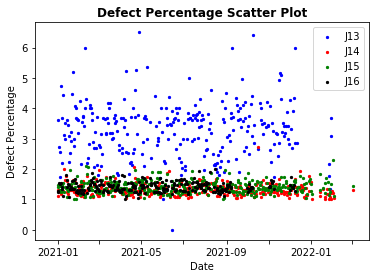

In [68]:
fig, ax = plt.subplots()
ax.set_title('Defect Percentage Scatter Plot',
             fontweight="bold")
df_13 = df3[df3["LineName"]=="J13"]
df_14 = df3[df3["LineName"]=="J14"]
df_15 = df3[df3["LineName"]=="J15"]
df_16 = df3[df3["LineName"]=="J16"]

plt.scatter(df_13["TimeStamp"], df_13["DefectPercentage"], s=5, c="blue", label="J13")
plt.scatter(df_14["TimeStamp"], df_14["DefectPercentage"], s=5, c="red", label = "J14")
plt.scatter(df_15["TimeStamp"], df_15["DefectPercentage"], s=5, c="green", label="J15")
plt.scatter(df_16["TimeStamp"], df_16["DefectPercentage"], s=5, c="black", label="J16")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Defect Percentage")
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# plt.savefig('Scatter_Plot_Defect_Count.png')


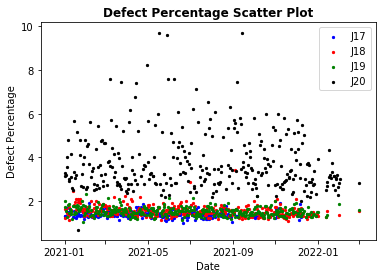

In [69]:
fig, ax = plt.subplots()
ax.set_title('Defect Percentage Scatter Plot',
             fontweight="bold")
df_13 = df3[df3["LineName"] == "J17"]
df_14 = df3[df3["LineName"] == "J18"]
df_15 = df3[df3["LineName"] == "J19"]
df_16 = df3[df3["LineName"] == "J20"]

plt.scatter(df_13["TimeStamp"], df_13["DefectPercentage"],
            s=5, c="blue", label="J17")
plt.scatter(df_14["TimeStamp"], df_14["DefectPercentage"],
            s=5, c="red", label="J18")
plt.scatter(df_15["TimeStamp"], df_15["DefectPercentage"],
            s=5, c="green", label="J19")
plt.scatter(df_16["TimeStamp"], df_16["DefectPercentage"],
            s=5, c="black", label="J20")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Defect Percentage")
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
# plt.savefig('Scatter_Plot_Defect_Count.png')


In [33]:
df2 = df.groupby("LineName")["DefectCountSum"].mean().reset_index()

In [34]:
df2

,LineName,DefectCountSum
0,J13,13.995960
1,J14,16.399090
2,J15,17.029276
3,J16,19.910309
4,J17,19.448936
5,J18,21.343505
6,J19,22.748072
7,J20,15.958974


In [54]:
df3 = pd.read_csv("ce_setout_final_R.csv")

In [55]:
df3

,Date,Time,Identifier,LineName,JobNumber,PONumber,SampleSize,cavity_identifier,DefectCode,DefectCount,Name
0,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,22bf2b29-6499-431d-92d4-3b611eb6db91,543,1,BREAKAGE
1,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,761c9653-dd85-44f9-a98d-905f2b01b112,543,1,BREAKAGE
2,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,0a338788-f21a-4a5d-a809-7c74d578ddaa,324,2,HEEL TAP
3,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,22bf2b29-6499-431d-92d4-3b611eb6db91,505,1,Bubble (>2.5 mm)
4,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,ad63c289-6eea-4f95-ad0a-f4c7622e7bc0,505,1,Bubble (>2.5 mm)
...,...,...,...,...,...,...,...,...,...,...,...
107535,2021-01-31,03:30:00,47a0a8cb-9535-4109-aa43-402222b0c9ed,J17,J18647,1021217,100,d7f2ba9b-9220-469c-8c6e-e13cbd010e3b,505,1,Bubble (>2.5 mm)
107536,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,dccb5b53-8fc4-4b35-b509-4979f6784fbe,505,1,Bubble (>2.5 mm)
107537,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,764819bb-e108-4e9a-9287-e584229b02df,505,1,Bubble (>2.5 mm)
107538,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,f2969450-f7cf-4579-8011-da2141fd70a1,324,1,HEEL TAP


In [56]:
df3 = df3[df3["Name"] == "Bubble (>2.5 mm)"]


In [57]:
df3

,Date,Time,Identifier,LineName,JobNumber,PONumber,SampleSize,cavity_identifier,DefectCode,DefectCount,Name
3,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,22bf2b29-6499-431d-92d4-3b611eb6db91,505,1,Bubble (>2.5 mm)
4,2021-11-03,21:30:00,1849d915-26c2-4fb1-b4a2-000183958622,J16,J19298,1022057,100,ad63c289-6eea-4f95-ad0a-f4c7622e7bc0,505,1,Bubble (>2.5 mm)
19,2021-07-05,01:30:00,0f16449c-1077-404f-bf6e-0001d2446839,J14,J20386,1023133,100,9dc2608d-49d6-4410-9a03-f4d191c20a3e,505,1,Bubble (>2.5 mm)
20,2021-07-05,01:30:00,0f16449c-1077-404f-bf6e-0001d2446839,J14,J20386,1023133,100,332ec6f0-a936-405c-9b00-b185f82ebadf,505,1,Bubble (>2.5 mm)
21,2021-07-05,01:30:00,0f16449c-1077-404f-bf6e-0001d2446839,J14,J20386,1023133,100,5bbdbd53-d3c8-41f3-8f5d-5ebf1df077e9,505,1,Bubble (>2.5 mm)
...,...,...,...,...,...,...,...,...,...,...,...
107530,2021-01-31,03:30:00,47a0a8cb-9535-4109-aa43-402222b0c9ed,J17,J18647,1021217,100,b37fe131-0955-49f8-8152-909975c6263c,505,1,Bubble (>2.5 mm)
107534,2021-01-31,03:30:00,47a0a8cb-9535-4109-aa43-402222b0c9ed,J17,J18647,1021217,100,10f7dd25-c087-4027-beff-93c792051e25,505,1,Bubble (>2.5 mm)
107535,2021-01-31,03:30:00,47a0a8cb-9535-4109-aa43-402222b0c9ed,J17,J18647,1021217,100,d7f2ba9b-9220-469c-8c6e-e13cbd010e3b,505,1,Bubble (>2.5 mm)
107536,2021-06-04,03:30:00,b86b4fd3-1e54-4f8d-ad6f-40261e38d3e2,J18,J20012,1022849,100,dccb5b53-8fc4-4b35-b509-4979f6784fbe,505,1,Bubble (>2.5 mm)


In [61]:
df4= df3.groupby("LineName")["DefectCount"].mean().reset_index()

In [63]:
df5 = df3.groupby("LineName")["DefectCount"].sum().reset_index()

In [62]:
df4

,LineName,DefectCount
0,J13,1.110204
1,J14,1.064182
2,J15,1.031575
3,J16,1.006214
4,J17,1.004061
5,J18,1.039486
6,J19,1.024116
7,J20,1.610656


In [64]:
df5

,LineName,DefectCount
0,J13,1632
1,J14,3797
2,J15,2875
3,J16,2267
4,J17,1978
5,J18,3238
6,J19,3185
7,J20,393


In [65]:
df_  = pd.read_csv("rm_composition_R.csv")

In [66]:
df_

,glass_properties_date,glass,chem_comp_SiO2,chem_comp_Al2O3,chem_comp_Fe2O3,chem_comp_CaO,chem_comp_MgO,chem_comp_Na2O,chem_comp_K2O,chem_comp_SO3,physical_test_density_gm_cc,physical_test_seed_count_result
0,02-07-2019,MOLTEN GLASS 160 TPD TYPE - III,71.46,1.64,0.026,10.64,2.48,13.55,0.0,0.136,2.5062,14
1,03-07-2019,MOLTEN GLASS 160 TPD TYPE - III,71.41,1.62,0.027,10.65,2.45,13.60,0.0,0.131,2.5073,17
2,04-07-2019,MOLTEN GLASS 160 TPD TYPE - III,71.32,1.62,0.026,10.72,2.42,13.62,0.0,0.134,2.5073,18
3,05-07-2019,MOLTEN GLASS 160 TPD TYPE - III,71.41,1.61,0.026,10.72,2.39,13.56,0.0,0.127,2.5076,13
4,06-07-2019,MOLTEN GLASS 160 TPD TYPE - III,71.43,1.61,0.026,10.65,2.45,13.58,0.0,0.125,2.5068,17
...,...,...,...,...,...,...,...,...,...,...,...,...
926,23-12-2021,MOLTEN GLASS 160 TPD TYPE - III,71.63,1.68,0.023,9.70,2.82,13.87,0.0,0.142,2.5032,19
927,25-12-2021,MOLTEN GLASS 160 TPD TYPE - III,71.62,1.67,0.023,9.68,2.82,13.88,0.0,0.145,2.4874,16
928,26-12-2021,MOLTEN GLASS 160 TPD TYPE - III,71.57,1.68,0.023,9.70,2.83,13.91,0.0,0.144,2.5029,20
929,28-12-2021,MOLTEN GLASS 160 TPD TYPE - III,71.48,1.72,0.024,9.71,2.77,13.99,0.0,0.140,2.5039,20


In [67]:
df_["glass_properties_date"] = pd.to_datetime(df_["glass_properties_date"])

In [68]:
df_

,glass_properties_date,glass,chem_comp_SiO2,chem_comp_Al2O3,chem_comp_Fe2O3,chem_comp_CaO,chem_comp_MgO,chem_comp_Na2O,chem_comp_K2O,chem_comp_SO3,physical_test_density_gm_cc,physical_test_seed_count_result
0,2019-02-07,MOLTEN GLASS 160 TPD TYPE - III,71.46,1.64,0.026,10.64,2.48,13.55,0.0,0.136,2.5062,14
1,2019-03-07,MOLTEN GLASS 160 TPD TYPE - III,71.41,1.62,0.027,10.65,2.45,13.60,0.0,0.131,2.5073,17
2,2019-04-07,MOLTEN GLASS 160 TPD TYPE - III,71.32,1.62,0.026,10.72,2.42,13.62,0.0,0.134,2.5073,18
3,2019-05-07,MOLTEN GLASS 160 TPD TYPE - III,71.41,1.61,0.026,10.72,2.39,13.56,0.0,0.127,2.5076,13
4,2019-06-07,MOLTEN GLASS 160 TPD TYPE - III,71.43,1.61,0.026,10.65,2.45,13.58,0.0,0.125,2.5068,17
...,...,...,...,...,...,...,...,...,...,...,...,...
926,2021-12-23,MOLTEN GLASS 160 TPD TYPE - III,71.63,1.68,0.023,9.70,2.82,13.87,0.0,0.142,2.5032,19
927,2021-12-25,MOLTEN GLASS 160 TPD TYPE - III,71.62,1.67,0.023,9.68,2.82,13.88,0.0,0.145,2.4874,16
928,2021-12-26,MOLTEN GLASS 160 TPD TYPE - III,71.57,1.68,0.023,9.70,2.83,13.91,0.0,0.144,2.5029,20
929,2021-12-28,MOLTEN GLASS 160 TPD TYPE - III,71.48,1.72,0.024,9.71,2.77,13.99,0.0,0.140,2.5039,20


In [75]:
df1_ = df_.groupby("glass_properties_date")[
    "physical_test_seed_count_result"].sum().reset_index()


In [76]:
df1_

,glass_properties_date,physical_test_seed_count_result
0,2019-01-08,17
1,2019-01-09,17
2,2019-01-10,19
3,2019-01-11,15
4,2019-01-12,15
...,...,...
734,2021-12-23,19
735,2021-12-25,16
736,2021-12-26,20
737,2021-12-28,20
